In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/content/testing_data.csv')
df_test = pd.read_csv('/content/training_data.csv')

# Approach/Strategy

I am going to begin with the categorical variables and run a decision tree on them to see what variables the tree is splitting on. I will then run a linear regression with the numerical variables, including the categorical variables that the tree indicated were predictive.

1. One-hot encode the categorical variables

In [4]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [5]:
#Get the categorical variables
X_train_categ = X_train.loc[:,['ever_married','gender','Residence_type','smoking_status','work_type'] ]
X_test_categ = X_test.loc[:,['ever_married','gender','Residence_type','smoking_status','work_type'] ]

In [7]:
#One-hot encoding for categorical variables
from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

In [26]:
Married_train = pd.get_dummies(X_train_categ['ever_married'], dtype='int')
MarriedDF_train = Married_train.rename(columns={'No': 'ever_married_Yes', 'Yes': 'ever_married_No'})
MarriedDF_train.head()

,ever_married_Yes,ever_married_No
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [25]:
Married_test = pd.get_dummies(X_test_categ['ever_married'], dtype='int')
MarriedDF_test = Married_test.rename(columns={'No': 'ever_married_Yes', 'Yes': 'ever_married_No'})
MarriedDF_test.head()

,ever_married_Yes,ever_married_No
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [46]:
GenderDF_train = pd.get_dummies(X_train_categ['gender'], dtype='int')
GenderDF_train.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
GenderDF_test = pd.get_dummies(X_test_categ['gender'], dtype='int')
GenderDF_test.drop(columns='Other', inplace=True)
GenderDF_test.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [29]:
ResidenceDF_train = pd.get_dummies(X_train_categ['Residence_type'], dtype='int')
ResidenceDF_train.head()

,Rural,Urban
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [30]:
ResidenceDF_test = pd.get_dummies(X_test_categ['Residence_type'], dtype='int')
ResidenceDF_test.head()

,Rural,Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [31]:
Smoking_train = pd.get_dummies(X_train_categ['smoking_status'],dtype='int')
oh = one_hot_encoder.fit_transform(X_train_categ['smoking_status']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
SmokingDF_train = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
SmokingDF_train.drop(columns='Unknown', inplace=True)
SmokingDF_train.head()

,formerly smoked,never smoked,smokes
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,1,0


In [32]:
Smoking_test = pd.get_dummies(X_test_categ['smoking_status'],dtype='int')
oh = one_hot_encoder.fit_transform(X_test_categ['smoking_status']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
SmokingDF_test = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
SmokingDF_test.drop(columns='Unknown', inplace=True)
SmokingDF_test.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0


In [33]:
Work_train = pd.get_dummies(X_train_categ['work_type'],dtype='int')
oh = one_hot_encoder.fit_transform(X_train_categ['work_type']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
WorkDF_train = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
WorkDF_train.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [34]:
Work_test = pd.get_dummies(X_test_categ['work_type'],dtype='int')
oh = one_hot_encoder.fit_transform(X_test_categ['work_type']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
WorkDF_test = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
WorkDF_test.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [35]:
X_train_categ_oh = pd.concat([MarriedDF_train,GenderDF_train,ResidenceDF_train, SmokingDF_train, WorkDF_train],axis=1)
X_train_categ_oh.head()

,ever_married_Yes,ever_married_No,Female,Male,Rural,Urban,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,0,1,0,0
4,0,1,1,0,0,1,0,1,0,0,0,0,1,0


In [49]:
X_test_categ_oh = pd.concat([MarriedDF_test,GenderDF_test,ResidenceDF_test, SmokingDF_test, WorkDF_test],axis=1)
X_test_categ_oh.head()

,ever_married_Yes,ever_married_No,Female,Male,Rural,Urban,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
1,0,1,1,0,1,0,0,1,0,1,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,1,0,0,0,0,1,0
4,1,0,1,0,0,1,0,0,0,0,0,1,0,0


2. Fit the decision tree with a max depth of 2

In [40]:
X_train_categ_oh.columns

Index(['ever_married_Yes', 'ever_married_No', 'Female', 'Male', 'Rural',
       'Urban', 'formerly smoked', 'never smoked', 'smokes', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype='object')

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.093\nsamples = 1023\nvalue = [973, 50]'),
 Text(0.25, 0.625, 'x[12] <= 0.5\ngini = 0.011\nsamples = 356\nvalue = [354, 2]'),
 Text(0.125, 0.375, 'x[6] <= 0.5\ngini = 0.006\nsamples = 337\nvalue = [336, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 319\nvalue = [319, 0]'),
 Text(0.1875, 0.125, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.75, 0.625, 'x[12] <= 0.5\ngini = 0.134\nsamples = 667\nvalue = [619, 48]'),
 Text(0.625, 0.375, 'x[6] <= 0.5\ngini = 0.119\nsamples = 534\nvalue = [500, 34]'),
 Text(0.5625, 0.125, 'gini = 0.105\nsamples = 413\nvalue = [390, 23]'),
 Text(0.6875, 0.125, 'gini = 0.165\nsamples = 121\nvalue = [110, 11]'),
 Text(0.875, 0.375, 'x[7] <= 0.5\ngini = 0.188\nsamples = 133\nvalue = [119, 14]'),
 Tex

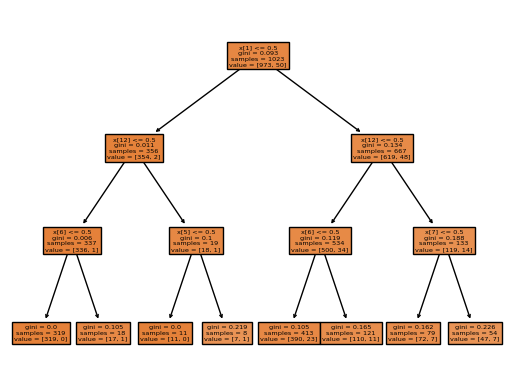

In [50]:
from sklearn import tree # Import the tree classifier

# Fit decision tree:
cart = tree.DecisionTreeClassifier(max_depth=3) # Create a classifier object
cart = cart.fit(X_train_categ_oh, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True)

The decision tree is splitting on marriage, work, and residence type and smoking status. So I will include those in the linear regression below.

In [51]:
#Checking current metrics
print('R2: ', cart.score(X_test_categ_oh, y_test)) # R squared measure
tree_predictions = cart.predict(X_test_categ_oh)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - tree_predictions)**2)/N )**.5 )   # R squared measure

R2:  0.951309028627355
RMSE:  0.22066030765102493


3. Run the linear regression with numeric variables and include the categorical variables that the tree splits on

Handling outliers in the numeric variables:

In [ ]:
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

<Axes: >

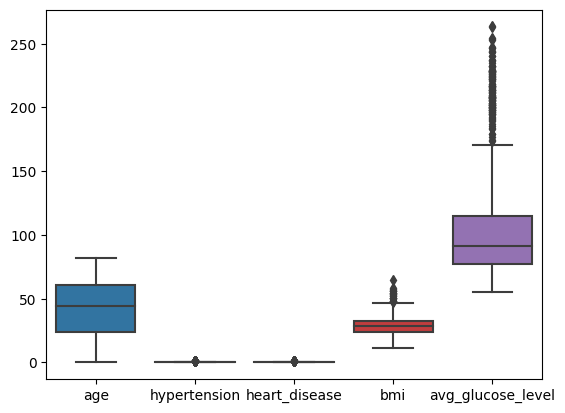

In [69]:
sns.boxplot(X_train_numeric)

<Axes: >

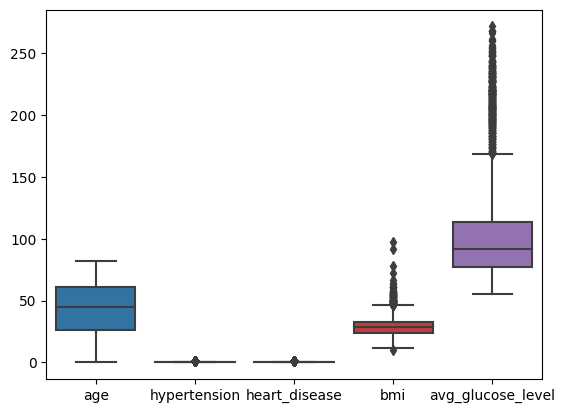

In [70]:
sns.boxplot(X_test_numeric)

In [71]:
## Function to compute whiskers:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

In [72]:
X_train_numeric.apply(windsorize)
X_test_numeric.apply(windsorize)

,age,hypertension,heart_disease,bmi,avg_glucose_level
0,36.0,0,0,32.2,65.87
1,45.0,0,0,25.3,68.66
2,58.0,0,0,30.7,168.67
3,61.0,0,0,27.1,69.88
4,78.0,0,0,30.6,103.86
...,...,...,...,...,...
4082,53.0,0,0,41.5,64.17
4083,76.0,0,0,27.0,168.67
4084,81.0,0,0,23.4,80.13
4085,55.0,0,0,40.0,168.67


<Axes: >

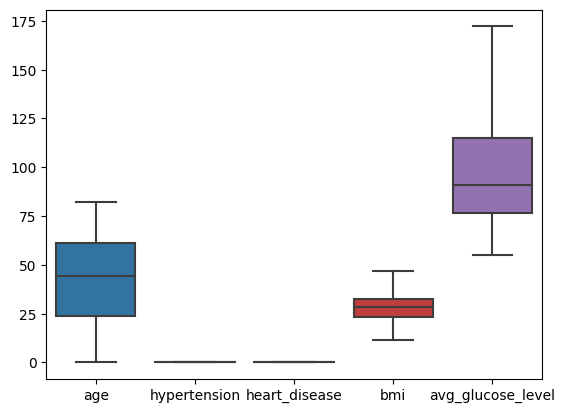

In [73]:
sns.boxplot(X_train_numeric)

<Axes: >

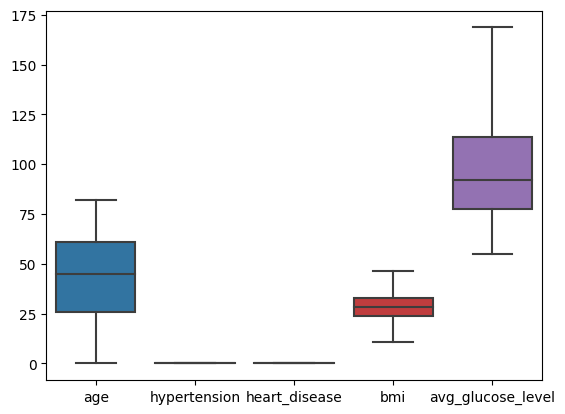

In [74]:
sns.boxplot(X_test_numeric)

In [75]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures


expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True),
                      MarriedDF_train],axis=1)

Z_train = pd.concat([continuous,dummies],axis=1)


expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True),
                      MarriedDF_test],axis=1)

Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure

R2:  0.08256466735469636
RMSE:  0.20614497816129246


4. Plot and visualize results

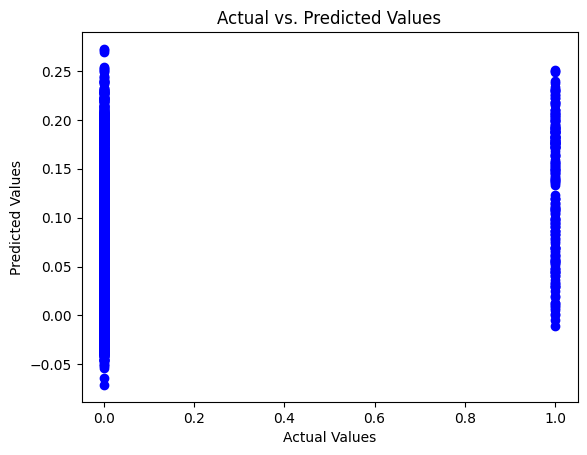

In [76]:
#Plot test against predicted values
plt.scatter(y_test, y_hat, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

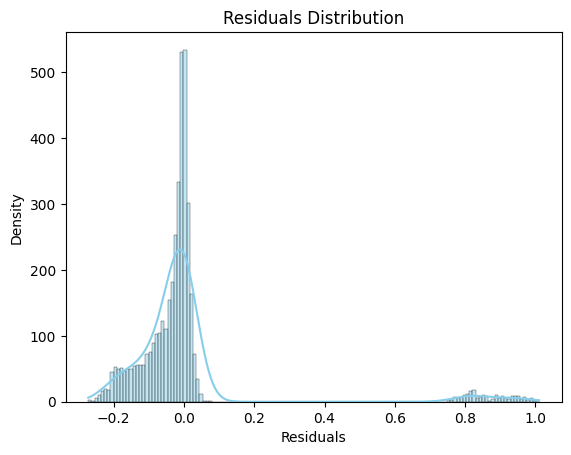

In [77]:
# Compute residuals
residuals = y_test - y_hat

sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()